Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import graphviz

Loading the dataset

In [4]:
dataset_pressure = pd.read_excel('../dataset/horseColic_out.xlsx')

In [5]:
dataset_pressure.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,ID
0,2,1,530101,38.5,66,28,3,3,0,2,...,0,0.0,3,5,45.0,8.4,0,0.0,2,1
1,1,1,534817,39.2,88,20,0,0,4,1,...,0,0.0,4,2,50.0,85.0,2,2.0,3,2
2,2,1,530334,38.3,40,24,1,1,3,1,...,0,0.0,1,1,33.0,6.7,0,0.0,1,3
3,1,9,5290409,39.1,164,84,4,1,6,2,...,2,5.0,3,5,48.0,7.2,3,5.3,2,4
4,2,1,530255,37.3,104,35,7,4,6,2,...,2,5.0,6,5,74.0,7.4,3,5.3,2,5


In [6]:
dataset_pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surgery                                              300 non-null    int64  
 1   Age                                                  300 non-null    int64  
 2   Hospital_Number                                      300 non-null    int64  
 3   rectal_temperature                                   300 non-null    float64
 4   pulse                                                300 non-null    int64  
 5   respiratory_rate                                     300 non-null    int64  
 6   temperature_of_extremities                           300 non-null    int64  
 7   peripheral_pulse                                     300 non-null    int64  
 8   mucous_membranes                                     300 non-null    i

In [7]:
dataset_pressure.isnull().any()

surgery                                                False
Age                                                    False
Hospital_Number                                        False
rectal_temperature                                     False
pulse                                                  False
respiratory_rate                                       False
temperature_of_extremities                             False
peripheral_pulse                                       False
mucous_membranes                                       False
capillary_refill_time                                  False
pain_a_subjective_judgement_of_the_horse_pain_level    False
peristalsis                                            False
abdominal_distension                                   False
nasogastric_tube                                       False
nasogastric_reflux                                     False
nasogastric_reflux_PH                                  False
rectal_examination_feces

C:\Users\Farid\AppData\Local\Temp\ipykernel_12960\2919586263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="outcome", data=dataset_pressure, palette="Set1")


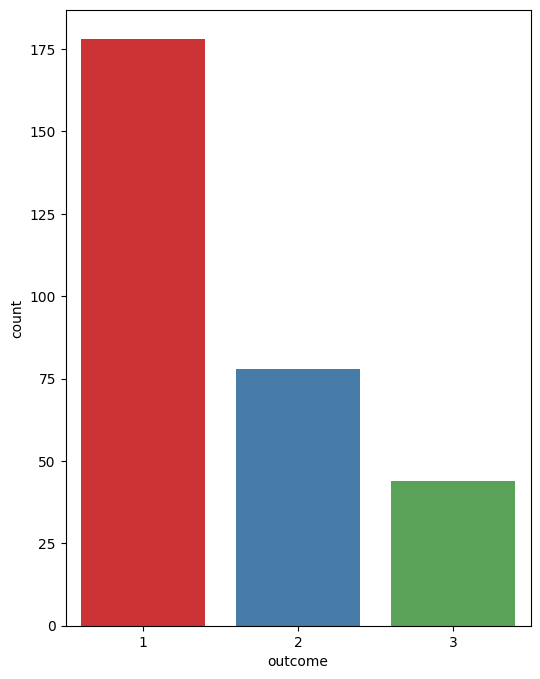

In [19]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="outcome", data=dataset_pressure, palette="Set1")
plt.show()

Drop Unneccesery column and Splitting dataset into train and test

In [8]:
X = dataset_pressure[['surgery','Age','Hospital_Number','rectal_temperature','pulse','respiratory_rate','temperature_of_extremities','peripheral_pulse','mucous_membranes','capillary_refill_time','pain_a_subjective_judgement_of_the_horse_pain_level','peristalsis','abdominal_distension','nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH','rectal_examination_feces','abdomen','packed_cell_volume','total_protein','abdominocentesis_appearance','abdomcentesis_total_protein']]
Y = dataset_pressure[['outcome']]

X_train, X_test, Y_train ,Y_test = train_test_split(X, Y, test_size=0.3)

### Models (DecisionTree)

In [9]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train ,Y_train)

DecisionTreeClassifier()

In [10]:
print(classifier.score(X_test ,Y_test))

0.6555555555555556


Confusion Matrix and report

In [11]:
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test ,Y_pred))


[[40 10  5]
 [ 5 11  6]
 [ 4  1  8]]


In [12]:
print(classification_report(Y_test ,Y_pred))

              precision    recall  f1-score   support

           1       0.82      0.73      0.77        55
           2       0.50      0.50      0.50        22
           3       0.42      0.62      0.50        13

    accuracy                           0.66        90
   macro avg       0.58      0.61      0.59        90
weighted avg       0.68      0.66      0.66        90



In [14]:
data = tree.export_graphviz(classifier ,out_file=None)
graph = graphviz.Source(data)
graph.render('../report/myTree')

'..\\report\\myTree.pdf'